<a href="https://colab.research.google.com/github/ShauryaDamathia/Novel-Insights/blob/main/Novel_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Overview**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

df = pd.read_csv('novels.csv')

df['genres'] = df['genres'].apply(literal_eval)

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (85, 5)

First 5 rows:


,title,author,pages,genres,ratings
0,Where the Crawdads Sing,Delia Owens,368,"[Fiction, Mystery]",4.5
1,The Midnight Library,Matt Haig,304,"[Fiction, Fantasy]",4.3
2,The Invisible Life of Addie LaRue,V.E. Schwab,448,"[Fantasy, Historical]",4.6
3,The Vanishing Half,Brit Bennett,352,"[Fiction, Historical]",4.3
4,The Song of Achilles,Madeline Miller,384,"[Fantasy, Mythology]",4.7



Data Types:
title       object
author      object
pages        int64
genres      object
ratings    float64
dtype: object

Summary Statistics:


,pages,ratings
count,85.000000,85.000000
mean,423.505882,4.435294
std,160.700892,0.236394
min,180.000000,3.500000
25%,334.000000,4.300000
50%,395.000000,4.500000
75%,464.000000,4.600000
max,1225.000000,4.800000


# **Missing Values Analysis**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
title      0
author     0
pages      0
genres     0
ratings    0
dtype: int64


# **Data Distribution**

### **Ratings Distribution**

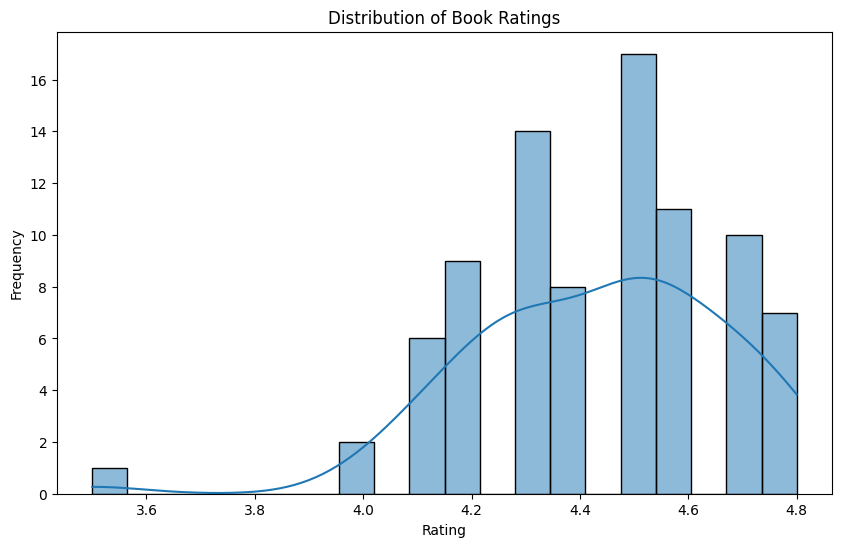

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### **Pages Distribution**

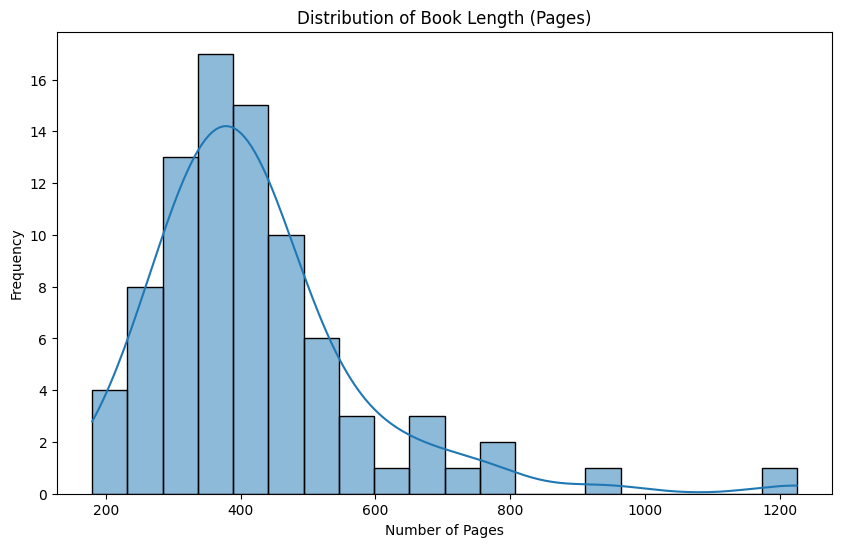

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pages'], bins=20, kde=True)
plt.title('Distribution of Book Length (Pages)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# **Outlier Detection**

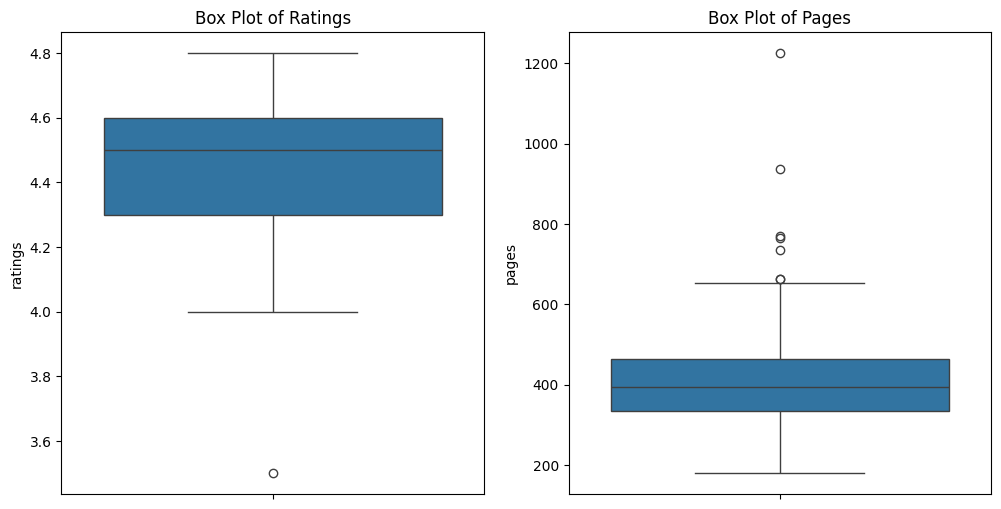

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['ratings'])
plt.title('Box Plot of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['pages'])
plt.title('Box Plot of Pages')
plt.show()

### **Analysis:**

1) Ratings are tightly clustered between 4.0 and 4.8

2) Pages has several outliers, particularly "War and Peace" with 1225 pages and "Shantaram" with 936 pages

# **Genre Analysis (Feature Encoding)**

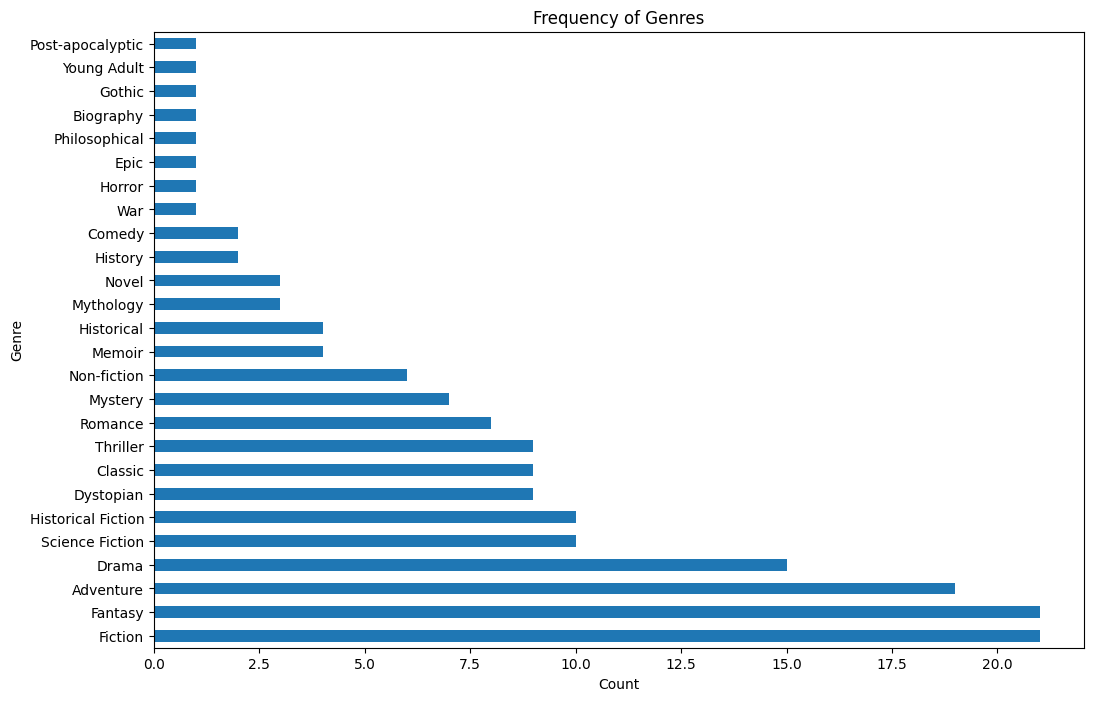

In [ ]:
genre_df = df.explode('genres')
genre_counts = genre_df['genres'].value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='barh')
plt.title('Frequency of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# **Relationships Between Variables**

### **Correlation Heatmap**

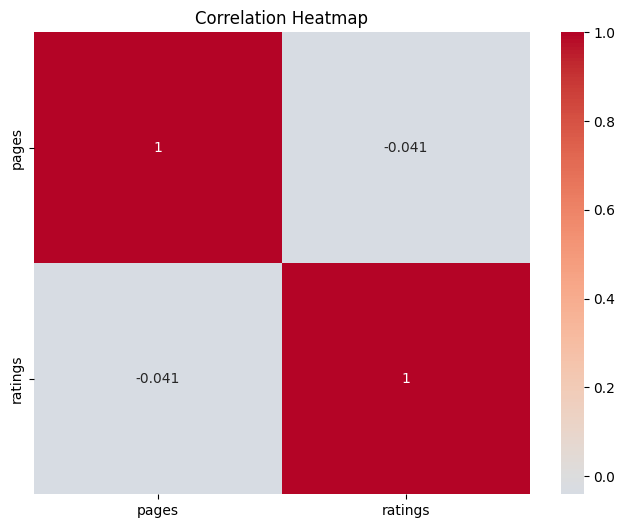

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### **Scatter Plot: Pages vs Ratings**

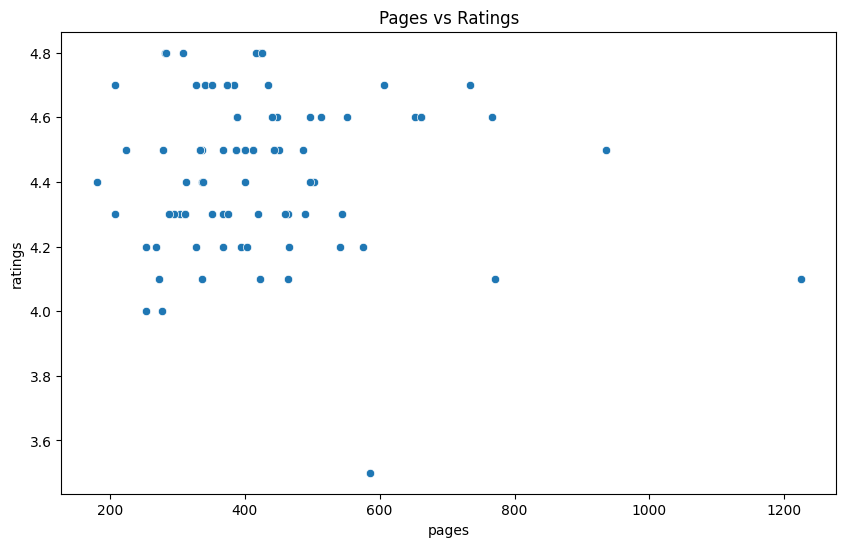

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='ratings', data=df)
plt.title('Pages vs Ratings')
plt.show()

# **Author Analysis**

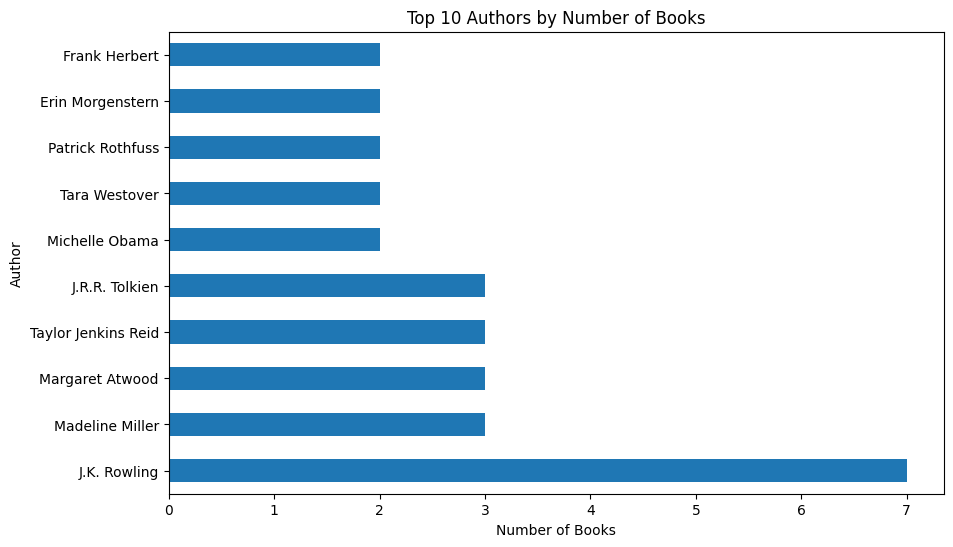


Top Rated Authors (with at least 2 books):


,avg_rating,book_count
author,,
Michelle Obama,4.800000,2
J.R.R. Tolkien,4.766667,3
Suzanne Collins,4.700000,2
J.K. Rowling,4.685714,7
Patrick Rothfuss,4.600000,2
Madeline Miller,4.566667,3
Taylor Jenkins Reid,4.500000,3
Tara Westover,4.500000,2
Erin Morgenstern,4.500000,2


In [ ]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

author_stats = df.groupby('author').agg({'ratings': ['mean', 'count']})
author_stats.columns = ['avg_rating', 'book_count']
top_rated_authors = author_stats[author_stats['book_count'] >= 2].sort_values('avg_rating', ascending=False).head(10)

print("\nTop Rated Authors (with at least 2 books):")
display(top_rated_authors)

# **Genre and Rating Relationship (Feature Extraction)**

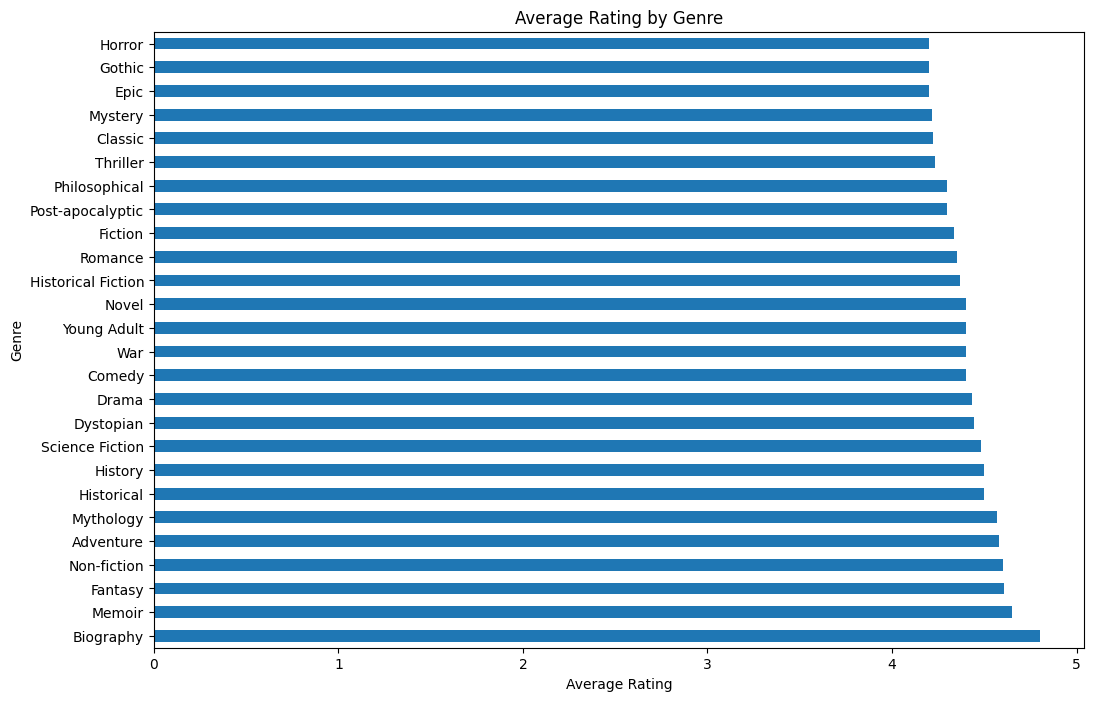

In [ ]:
genre_ratings = genre_df.groupby('genres')['ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
genre_ratings.plot(kind='barh')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()